In [1]:
import h2o
import pandas as pd
import seaborn as sns
import imp
import math
import numpy as np

In [2]:
h2o.init()

/Users/lzq857/anaconda/lib/python2.7/site-packages/h2o/backend/connection.py:312: UserWarning: Proxy is defined in the environment: http_proxy. This may interfere with your H2O Connection.
  "This may interfere with your H2O Connection." % name)
/Users/lzq857/anaconda/lib/python2.7/site-packages/h2o/backend/connection.py:312: UserWarning: Proxy is defined in the environment: HTTP_PROXY. This may interfere with your H2O Connection.
  "This may interfere with your H2O Connection." % name)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 11 mins
H2O cluster version:,3.10.4.3
H2O cluster version age:,2 months and 5 days
H2O cluster name:,H2O_from_python_LZQ857_9la9w8
H2O cluster total nodes:,1
H2O cluster free memory:,3.352 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [3]:
'''
Applying K-mean clustering
Iris flower data set
'''

df_iris = h2o.import_file(path="./iris.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
df_iris.columns

[u'C1', u'C2', u'C3', u'C4', u'C5']

In [5]:
df_iris.columns = ['sepal_len','sepal_wid','petal_len','petal_wid','class']
df_iris.describe()

Rows:150
Cols:5




,sepal_len,sepal_wid,petal_len,petal_wid,class
type,real,real,real,real,enum
mins,4.3,2.0,1.0,0.1,
mean,5.84832214765,3.054,3.75866666667,1.19866666667,
maxs,7.9,4.4,6.9,2.5,
sigma,0.828594057266,0.433594311362,1.76442041995,0.763160741701,
zeros,0,0,0,0,
missing,1,0,0,0,0
0,nan,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [7]:
'''
model = H2OKMeansEstimator(model_id = "kmeans", k=100, init="Random", seed=2, standardize=True, estimate_k=True)
'''

'''
Train multiple models for various numbers of clusters
'''

models = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,20)]

for estimator in models:
    estimator.train(x=df_iris.col_names[0:-1], training_frame = df_iris)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress:

In [8]:
%matplotlib inline
sns.set()

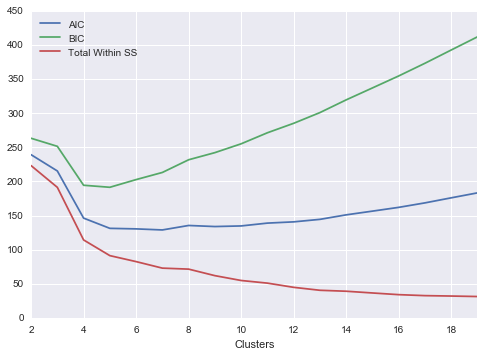

In [9]:
'''
Performance metric
'''

def diagnostics_from_clusteringmodel(model):
    total_within_sumofsquares = model.tot_withinss()
    number_of_clusters = len(model.centers())
    number_of_dimensions = len(model.centers()[0])
    number_of_rows = sum(model.size())
    
    aic = total_within_sumofsquares + 2 * number_of_dimensions * number_of_clusters
    bic = total_within_sumofsquares + math.log(number_of_rows) * number_of_dimensions * number_of_clusters
    
    return {'Clusters':number_of_clusters,
            'Total Within SS':total_within_sumofsquares, 
            'AIC':aic, 
            'BIC':bic}

diagnostics = pd.DataFrame( [diagnostics_from_clusteringmodel(model) for model in models])
diagnostics.set_index('Clusters', inplace=True)
diagnostics.plot(kind='line')

In [10]:
optimal_k = 4

'''
Prediction
'''

clusters = optimal_k
predicted = models[clusters-2].predict(df_iris) # cluster_k is the k-2 th model in models
df_iris["Predicted"] = predicted["predict"].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


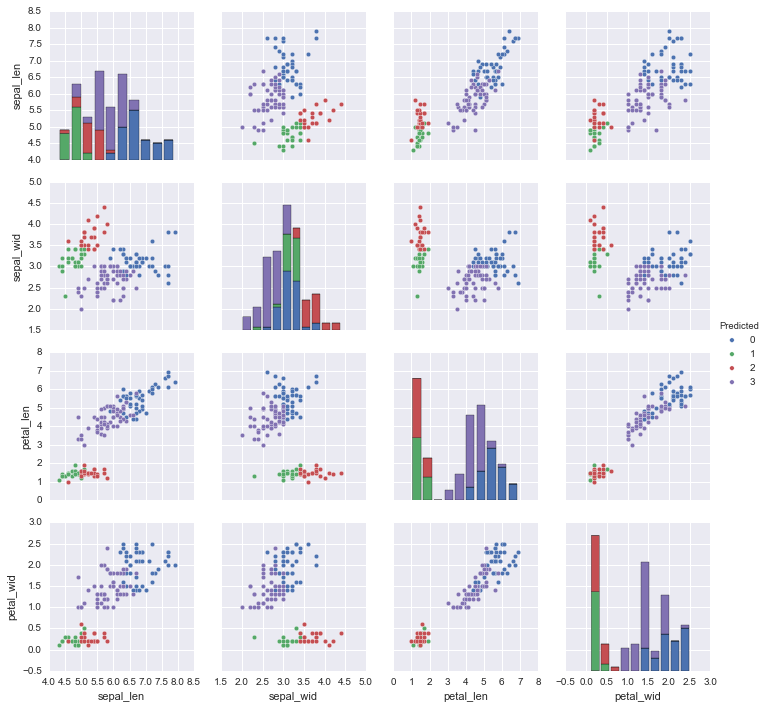

In [11]:
sns.pairplot(df_iris.as_data_frame(True), vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"],  hue="Predicted");